# Regression

## Linear  Regression

### Simple Linear Regression With scikit-learn

#### Import Packages and Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

#### Provide Data

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


#### Craete Model and Fit It

In [4]:
model = LinearRegression()

In [5]:
model.fit(x, y)

LinearRegression()

In [6]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [7]:
model = LinearRegression().fit(x, y)

In [8]:
r_sq = model.score(x, y)
print('coefficient od determination: ', r_sq)

coefficient od determination:  0.7158756137479542


In [9]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

intercept:  5.633333333333329
slope:  [0.54]


In [10]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print("intercept: ", new_model.intercept_)
print('slope: ', new_model.coef_)

intercept:  [5.63333333]
slope:  [[0.54]]


In [11]:
y_pred = model.predict(x)
print('predict response: ', y_pred, sep='\n')

predict response: 
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


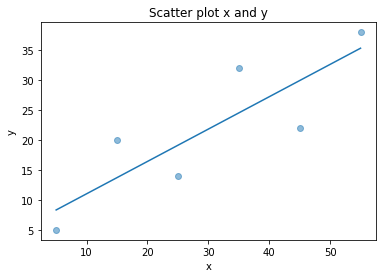

In [12]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
y_pred = model.intercept_ + model.coef_ * x
print('predict response:', y_pred, sep='\n')

predict response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [14]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


### Multiple Linear Regression With scikit-learn

#### Import packages and classes, and provide data

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [17]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


#### Create a model and fit it

In [18]:
model = LinearRegression().fit(x, y)

#### Get results

In [19]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept', model.intercept_)
print('slope', model.coef_)

coefficient of determination: 0.8615939258756776
intercept 5.5225792751981935
slope [0.44706965 0.25502548]


#### Predict response

In [20]:
y_pred = model.predict(x)
print('predicted responce: ', y_pred, sep='\n')

predicted responce: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [21]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [22]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


### Polynomial Regression With scikit-learn

#### Import packages and classes

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### Provide data

In [24]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 11, 2, 8, 25, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 11  2  8 25 32]


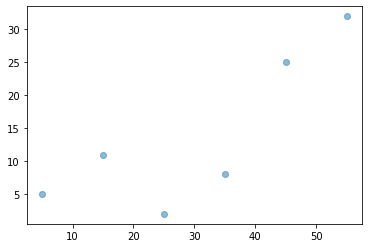

In [25]:
plt.scatter(x, y, alpha=0.5)

#### Transform input data

In [26]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [27]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [28]:
x_ = transformer.transform(x)

In [29]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [30]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


#### Create model and fit it

In [31]:
model = LinearRegression().fit(x_, y)

#### Get results

In [32]:
r_sq = model.score(x_, y)
print('coefficient of determination: ', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination:  0.86713186556973
intercept: 9.988392857142875
coefficients: [-0.645       0.01946429]


In [33]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [34]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [35]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [36]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.86713186556973
intercept: 0.0
coefficients: [ 9.98839286 -0.645       0.01946429]


#### Predict response

In [37]:
y_pred = model.predict(x_)
print('predict response:', y_pred, sep='\n')

predict response:
[ 7.25        4.69285714  6.02857143 11.25714286 20.37857143 33.39285714]


In [39]:
# Step 1 : Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a : provide Data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform Input Data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_,y)

# Step 4 : Get Results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

In [40]:
print('coefficient of determination: ', r_sq)
print('intercept:', intercept)
print('coefficient:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination:  0.9453701449127822
intercept: 0.8430556452397582
coefficient:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


### Advanced Linear Regression With statsmodels

#### Import Packages

In [41]:
import numpy as np
import statsmodels.api as sm

#### Provide data and transform inputs

In [42]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [44]:
x = sm.add_constant(x)

In [46]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


#### Create a model and fit it

In [47]:
model = sm.OLS(y, x)

In [48]:
results = model.fit()

#### Get results

In [49]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Thu, 19 Oct 2023   Prob (F-statistic):            0.00713
Time:                        16:48:25   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [50]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]


#### Predict response

In [53]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [55]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


### Implementing Linear Regression on Real Dataset

#### Using Statsmodels

In [57]:
import statsmodels.api as sm
from sklearn import datasets
data = datasets.load_boston()

In [58]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature name
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [63]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [65]:
X = df['RM']
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                   3.74e-256
Time:                        17:31:07   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

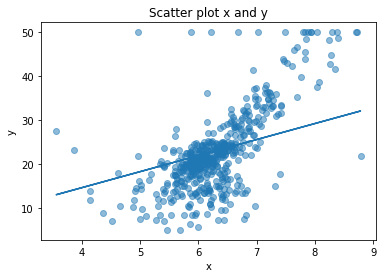

In [66]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Using SKlearn

In [70]:
from sklearn import linear_model
from sklearn import datasets # import datasets form scikitlearn
data = datasets.load_boston() # loads Boston dataset from datasets library

# define the data/predictors as the pre-set feature names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target
target = pd.DataFrame(data.target, columns=['MEDV'])

In [86]:
X = df
y = target['MEDV']

In [87]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [88]:
lm.score(X,y)

0.7406426641094095

#### Using SKlearn Example 2

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [91]:
df.shape

(205, 2)

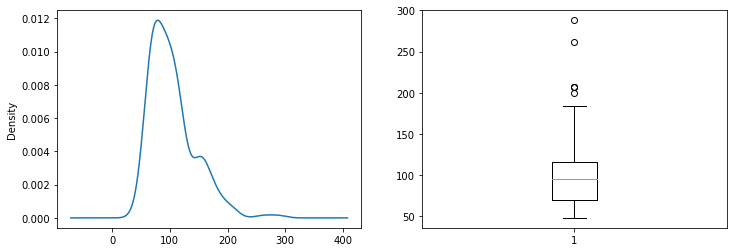

In [92]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

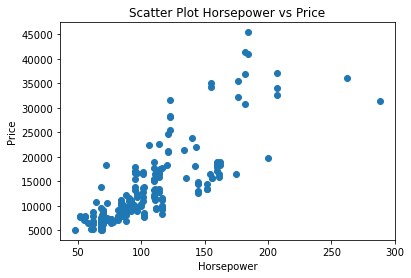

In [93]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [94]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [95]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [100]:
x_train.shape

(164, 1)

In [101]:
x_test.shape

(41, 1)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [105]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [106]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[169.86692688]]
[-4502.35788766]


In [107]:
lin_reg.score(x_test, y_test)

0.5645808116662845

Text(0.5, 1.0, 'Plot Horsepower vs Price')

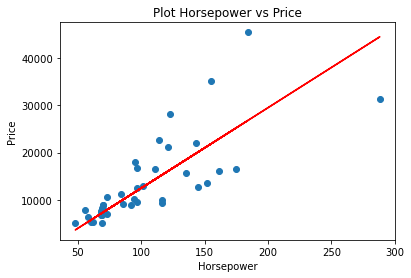

In [109]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [110]:
lin_reg.predict([[100]])

array([[12484.33480034]])

In [111]:
lin_reg.predict([[150]])

array([[20977.68114433]])

In [112]:
lin_reg.predict([[200]])

array([[29471.02748833]])